In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../workshop3-cleaningData/Salary_Data_Cleaned.csv") #read in csv

In [3]:
df.columns #print columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Company', 'min_sal', 'max_sal', 'Salary(Avg)', 'State', 'City',
       'Position at HQ', 'Company Age', 'JavaScript', 'Python', 'C_plus',
       'SQL', 'AWS'],
      dtype='object')

In [4]:
df_model = df[['Rating', 'Size' , 'Type of ownership' , 'Industry', 'Sector' , 'Revenue' , 'Salary(Avg)' , 
             'State' , 'City' , 'Position at HQ' , 'Company Age']] #seperate variables

In [5]:
df_model.head() #show head

,Rating,Size,Type of ownership,Industry,Sector,Revenue,Salary(Avg),State,City,Position at HQ,Company Age
0,4.4,51 to 200 employees,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),132.0,NC,Boone,0,15
1,3.6,201 to 500 employees,Subsidiary or Business Segment,Advertising & Marketing,Business Services,Unknown / Non-Applicable,132.0,WI,Marshfield,0,20
2,4.7,201 to 500 employees,Company - Private,Internet,Information Technology,$10 to $25 million (USD),132.0,TX,Austin,1,5
3,4.2,51 to 200 employees,Company - Private,Logistics & Supply Chain,Transportation & Logistics,Unknown / Non-Applicable,132.0,FL,Jacksonville,1,28
4,4.0,201 to 500 employees,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD),132.0,MO,O'Fallon,1,35


In [6]:
df_dum = pd.get_dummies(df_model) #create dummy for categorical data

In [7]:
df_dum.head() #shows dummies

,Rating,Salary(Avg),Position at HQ,Company Age,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,...,City_West Chester,City_Westwood,City_White Plains,City_Wichita,City_Wilsonville,City_Winston-Salem,City_Winter Park,City_Woodbridge,City_Woodland Hills,City_Woodstock
0,4.4,132.0,0,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.6,132.0,0,20,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,132.0,1,5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.2,132.0,1,28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,132.0,1,35,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split

#create a train test split
y = df_dum['Salary(Avg)'].values #creates an array and is more recommended for models
X = df_dum.drop("Salary(Avg)" , axis=1)

X_train , X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=1)

In [9]:
y_train.shape

(700,)

In [10]:
X_train.shape

(700, 389)

In [11]:
from sklearn.linear_model import LinearRegression, Lasso #importing model
from sklearn.model_selection import cross_val_score #cross validate to see how model is performing

#Linear Regression
model_LR = LinearRegression() #choosing model type
model_LR.fit(X_train, y_train) #this is the model gettin trained

np.mean(cross_val_score(model_LR, X_train, y_train,scoring='neg_mean_absolute_error'))

-10800693038.182928

In [12]:
#lasso regression
model_L = Lasso(alpha=1.4)
model_L.fit(X_train,y_train)

np.mean(cross_val_score(model_L, X_train, y_train,scoring='neg_mean_absolute_error'))

alpha = []
error = []
for i in range(1,100):
    alpha.append(i/10)
    lml = Lasso(alpha=(i/10))
    error.append(np.mean(cross_val_score(lml, X_train, y_train,scoring='neg_mean_absolute_error')))

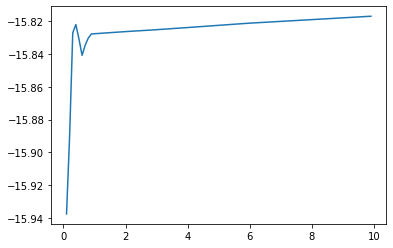

In [13]:
plt.plot(alpha,error)
plt.show()

In [14]:
error

[-15.93759602247565,
 -15.889348241988651,
 -15.826958088445846,
 -15.82197359832291,
 -15.830746261428654,
 -15.840767576216205,
 -15.83458517835661,
 -15.830202608893137,
 -15.82769304054176,
 -15.827560636887602,
 -15.827428233233444,
 -15.827295829579288,
 -15.82716412242155,
 -15.827035300072684,
 -15.826906477723815,
 -15.826777655374949,
 -15.826648833026084,
 -15.826520010677218,
 -15.82639118832835,
 -15.826262365979483,
 -15.826139766533199,
 -15.826017618399238,
 -15.825900523126014,
 -15.82578770027234,
 -15.825674877418663,
 -15.825562054564992,
 -15.825449231711318,
 -15.825336408857643,
 -15.825214299327788,
 -15.82508373800627,
 -15.824953176684755,
 -15.824822615363237,
 -15.82469205404172,
 -15.824561492720202,
 -15.824430931398684,
 -15.824300370077168,
 -15.82416980875565,
 -15.824039247434133,
 -15.823908686112617,
 -15.8237781247911,
 -15.823643933711557,
 -15.82350888562569,
 -15.823373837539824,
 -15.823238789453958,
 -15.82310374136809,
 -15.822968693282224,
 -

In [15]:
from sklearn.ensemble import RandomForestRegressor

#random forest
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)

np.mean(cross_val_score(model_L, X_train, y_train, scoring='neg_mean_absolute_error'))

-15.827035300072684

In [20]:
#test models
pred_LR = model_LR.predict(X_test)
pred_L = model_L.predict(X_test)
pred_RF = model_RF.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_LR)

1916241770.1631424

In [23]:
mean_absolute_error(y_test,pred_L)

15.910361775254477

In [24]:
mean_absolute_error(y_test,pred_RF)

15.619955932450612

In [26]:
mean_absolute_error(y_test,(pred_L+pred_RF)/2)

15.306979890316352